In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/flights.csv')
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [ ]:
## goal - predict whether a flight will be delayed by > 50 mins

## **Non-Informative and Unnecessary Variables**



In [2]:
df.drop(['DIVERTED', 'CANCELLED'], axis = 1, inplace = True)

## **Binning Numeric Variables**

In [7]:
## SCHED DEP BINNING
df.loc[df['SCHED_DEP'].between(0, 600, 'both'), 'DEP_TIME'] = 'Red Eye'
df.loc[df['SCHED_DEP'].between(600, 1200, 'right'), 'DEP_TIME'] = 'Morning'
df.loc[df['SCHED_DEP'].between(1200, 1800, 'right'), 'DEP_TIME'] = 'Afternoon'
df.loc[df['SCHED_DEP'].between(1800, 2400, 'both'), 'DEP_TIME'] = 'Night'

In [8]:
df.drop('SCHED_DEP', axis = 1, inplace = True)

In [9]:
## SCHED_ARR BINNING
df.loc[df['SCHED_ARR'].between(0, 600, 'both'), 'ARR_TIME'] = 'Red Eye'
df.loc[df['SCHED_ARR'].between(600, 1200, 'right'), 'ARR_TIME'] = 'Morning'
df.loc[df['SCHED_ARR'].between(1200, 1800, 'right'), 'ARR_TIME'] = 'Afternoon'
df.loc[df['SCHED_ARR'].between(1800, 2400, 'both'), 'ARR_TIME'] = 'Night'

In [10]:
df.drop('SCHED_ARR', axis = 1, inplace = True)

In [11]:
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,DEP_DELAY,AIR_TIME,DIST,ARR_DELAY,DEP_TIME,ARR_TIME
0,1,1,4,WN,LAX,SLC,58.0,94.0,590,65.0,Afternoon,Night
1,1,1,4,UA,DEN,IAD,7.0,154.0,1452,-13.0,Morning,Afternoon
2,1,1,4,MQ,DFW,VPS,36.0,85.0,641,35.0,Afternoon,Afternoon
3,1,1,4,AA,DFW,DCA,7.0,126.0,1192,-7.0,Afternoon,Night
4,1,1,4,WN,LAX,MCI,48.0,166.0,1363,39.0,Afternoon,Night


In [12]:
df.drop('ARR_DELAY', axis = 1, inplace = True)

In [13]:
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,DEP_DELAY,AIR_TIME,DIST,DEP_TIME,ARR_TIME
0,1,1,4,WN,LAX,SLC,58.0,94.0,590,Afternoon,Night
1,1,1,4,UA,DEN,IAD,7.0,154.0,1452,Morning,Afternoon
2,1,1,4,MQ,DFW,VPS,36.0,85.0,641,Afternoon,Afternoon
3,1,1,4,AA,DFW,DCA,7.0,126.0,1192,Afternoon,Night
4,1,1,4,WN,LAX,MCI,48.0,166.0,1363,Afternoon,Night


## Create DELAYED variable

DELAYED = {0: '< 50 mins', 1: '>= 50 mins'}

In [14]:
df['DELAYED'] = (df.DEP_DELAY > 50).astype('int')

In [15]:
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,DEP_DELAY,AIR_TIME,DIST,DEP_TIME,ARR_TIME,DELAYED
0,1,1,4,WN,LAX,SLC,58.0,94.0,590,Afternoon,Night,1
1,1,1,4,UA,DEN,IAD,7.0,154.0,1452,Morning,Afternoon,0
2,1,1,4,MQ,DFW,VPS,36.0,85.0,641,Afternoon,Afternoon,0
3,1,1,4,AA,DFW,DCA,7.0,126.0,1192,Afternoon,Night,0
4,1,1,4,WN,LAX,MCI,48.0,166.0,1363,Afternoon,Night,0


In [16]:
df.drop('DEP_DELAY', axis = 1, inplace = True)

In [17]:
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,AIR_TIME,DIST,DEP_TIME,ARR_TIME,DELAYED
0,1,1,4,WN,LAX,SLC,94.0,590,Afternoon,Night,1
1,1,1,4,UA,DEN,IAD,154.0,1452,Morning,Afternoon,0
2,1,1,4,MQ,DFW,VPS,85.0,641,Afternoon,Afternoon,0
3,1,1,4,AA,DFW,DCA,126.0,1192,Afternoon,Night,0
4,1,1,4,WN,LAX,MCI,166.0,1363,Afternoon,Night,0


## Check Levels of Categoricals

In [18]:
df.AIRLINE.unique()

array(['WN', 'UA', 'MQ', 'AA', 'F9', 'EV', 'OO', 'NK', 'US', 'AS', 'DL',
       'VX', 'B6', 'HA'], dtype=object)

In [19]:
df.ORG_AIR.unique()

array(['LAX', 'DEN', 'DFW', 'IAH', 'SFO', 'ORD', 'PHX', 'ATL', 'LAS',
       'MSP'], dtype=object)

In [20]:
df.DEST_AIR.unique()

array(['SLC', 'IAD', 'VPS', 'DCA', 'MCI', 'SAN', 'MSY', 'PHX', 'STL',
       'SJC', 'DRO', 'JAN', 'MSP', 'CMH', 'IND', 'DFW', 'SGU', 'DTW',
       'DAY', 'LAX', 'BWI', 'CLE', 'HOU', 'BTR', 'SPI', 'AUS', 'JAC',
       'MDW', 'RNO', 'DEN', 'MIA', 'LAS', 'PHL', 'OKC', 'SEA', 'ABQ',
       'PIT', 'TPA', 'SAT', 'CID', 'FSD', 'SFO', 'RSW', 'SBP', 'CRP',
       'ASE', 'LGA', 'BUR', 'DLH', 'RAP', 'BNA', 'FLL', 'ICT', 'ORD',
       'MCO', 'ATL', 'SJT', 'FNT', 'OMA', 'BOI', 'SMF', 'PBI', 'OAK',
       'JFK', 'COS', 'GSO', 'TUS', 'GRR', 'TXK', 'LAW', 'CLT', 'LNK',
       'MKE', 'LRD', 'SCE', 'BOS', 'LEX', 'RDU', 'PNS', 'PSP', 'IAH',
       'GTF', 'HSV', 'RIC', 'ELP', 'SGF', 'DIK', 'BHM', 'GEG', 'PDX',
       'CRW', 'LIT', 'BZN', 'EWR', 'FWA', 'GNV', 'KOA', 'MFE', 'AGS',
       'SUX', 'HPN', 'GJT', 'CVG', 'TUL', 'ATW', 'LFT', 'BIL', 'JAX',
       'XNA', 'TYS', 'GRB', 'HOB', 'ANC', 'HDN', 'GUC', 'LSE', 'PIA',
       'SHV', 'LBB', 'CAE', 'IDA', 'SRQ', 'FAT', 'EUG', 'MHK', 'HNL',
       'DSM', 'ISN',

In [21]:
## example we read only the response AND the categorical variable you want to reduce dimensions
yvar = 'DELAYED'
xvar = 'DEST_AIR'
df_to_collapse = df[[yvar, xvar]]

## we dummy-encode the variable
df_to_collapse = pd.get_dummies(df_to_collapse, drop_first = True)
df_to_collapse.head()

## next import the random forest
from sklearn.ensemble import RandomForestClassifier

## we fit the random forest
rf = RandomForestClassifier()
rf.fit(df_to_collapse.drop(yvar, axis = 1), df_to_collapse[yvar])

feature_importances = pd.DataFrame({'Variable' :df_to_collapse.drop(yvar, axis = 1).columns, 'Importance': rf.feature_importances_})
feature_importances.set_index('Variable', inplace = True)
feature_importances = feature_importances.sort_values(by = 'Importance')

In [22]:
feature_importances

,Importance
Variable,
DEST_AIR_FAI,0.000123
DEST_AIR_ITO,0.000197
DEST_AIR_IMT,0.000200
DEST_AIR_CEC,0.000215
DEST_AIR_MMH,0.000400
...,...
DEST_AIR_IAH,0.019206
DEST_AIR_MQT,0.026504
DEST_AIR_LGA,0.029683


In [23]:
## create the dummy variables identified
df['DEST_AIR_SFO'] = (df["DEST_AIR"] == "SFO").astype('int')
df['DEST_AIR_EWR'] = (df["DEST_AIR"] == 'EWR').astype('int')
df['DEST_AIR_LGA'] = (df["DEST_AIR"] == 'LGA').astype('int')

df.drop('DEST_AIR', inplace = True, axis = 1)

## Encode using dummy encoding

In [24]:
df = pd.get_dummies(df, drop_first = True)

In [25]:
df.head()

,MONTH,DAY,WEEKDAY,AIR_TIME,DIST,DELAYED,DEST_AIR_SFO,DEST_AIR_EWR,DEST_AIR_LGA,AIRLINE_AS,...,ORG_AIR_MSP,ORG_AIR_ORD,ORG_AIR_PHX,ORG_AIR_SFO,DEP_TIME_Morning,DEP_TIME_Night,DEP_TIME_Red Eye,ARR_TIME_Morning,ARR_TIME_Night,ARR_TIME_Red Eye
0,1,1,4,94.0,590,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,4,154.0,1452,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,4,85.0,641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,4,126.0,1192,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,4,166.0,1363,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## **Check for Missing**

In [26]:
df.isna().sum()

MONTH                  0
DAY                    0
WEEKDAY                0
AIR_TIME            1018
DIST                   0
DELAYED                0
DEST_AIR_SFO           0
DEST_AIR_EWR           0
DEST_AIR_LGA           0
AIRLINE_AS             0
AIRLINE_B6             0
AIRLINE_DL             0
AIRLINE_EV             0
AIRLINE_F9             0
AIRLINE_HA             0
AIRLINE_MQ             0
AIRLINE_NK             0
AIRLINE_OO             0
AIRLINE_UA             0
AIRLINE_US             0
AIRLINE_VX             0
AIRLINE_WN             0
ORG_AIR_DEN            0
ORG_AIR_DFW            0
ORG_AIR_IAH            0
ORG_AIR_LAS            0
ORG_AIR_LAX            0
ORG_AIR_MSP            0
ORG_AIR_ORD            0
ORG_AIR_PHX            0
ORG_AIR_SFO            0
DEP_TIME_Morning       0
DEP_TIME_Night         0
DEP_TIME_Red Eye       0
ARR_TIME_Morning       0
ARR_TIME_Night         0
ARR_TIME_Red Eye       0
dtype: int64

In [28]:
## imputation mean
df['AIR_TIME'].fillna(df['AIR_TIME'].mean(), inplace = True)

In [29]:
df.isna().sum()

MONTH               0
DAY                 0
WEEKDAY             0
AIR_TIME            0
DIST                0
DELAYED             0
DEST_AIR_SFO        0
DEST_AIR_EWR        0
DEST_AIR_LGA        0
AIRLINE_AS          0
AIRLINE_B6          0
AIRLINE_DL          0
AIRLINE_EV          0
AIRLINE_F9          0
AIRLINE_HA          0
AIRLINE_MQ          0
AIRLINE_NK          0
AIRLINE_OO          0
AIRLINE_UA          0
AIRLINE_US          0
AIRLINE_VX          0
AIRLINE_WN          0
ORG_AIR_DEN         0
ORG_AIR_DFW         0
ORG_AIR_IAH         0
ORG_AIR_LAS         0
ORG_AIR_LAX         0
ORG_AIR_MSP         0
ORG_AIR_ORD         0
ORG_AIR_PHX         0
ORG_AIR_SFO         0
DEP_TIME_Morning    0
DEP_TIME_Night      0
DEP_TIME_Red Eye    0
ARR_TIME_Morning    0
ARR_TIME_Night      0
ARR_TIME_Red Eye    0
dtype: int64

In [ ]:
df.dropna(inplace = True)

## **Modeling**

In [30]:
## split the data into training test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('DELAYED', axis = 1), df.DELAYED, test_size = 0.3, random_state = 591)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [33]:
## Fit an unrestricted tree
dt = DecisionTreeClassifier()  ## gini tree

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
plt.figure(figsize = (10, 16))
tree.plot_tree(dt, feature_names=X_train.columns, fontsize = 6)

[Text(0.6906537284080873, 0.9888888888888889, 'ARR_TIME_Night <= 0.5\ngini = 0.141\nsamples = 40944\nvalue = [37820, 3124]'),
 Text(0.46337275908445025, 0.9666666666666667, 'ARR_TIME_Red Eye <= 0.5\ngini = 0.111\nsamples = 25924\nvalue = [24388, 1536]'),
 Text(0.40409374020037714, 0.9444444444444444, 'AIRLINE_DL <= 0.5\ngini = 0.106\nsamples = 24465\nvalue = [23093, 1372]'),
 Text(0.32920657283714344, 0.9222222222222223, 'ARR_TIME_Morning <= 0.5\ngini = 0.115\nsamples = 20051\nvalue = [18821, 1230]'),
 Text(0.2561060554559093, 0.9, 'DIST <= 2853.0\ngini = 0.132\nsamples = 12703\nvalue = [11798, 905]'),
 Text(0.22196342641411218, 0.8777777777777778, 'AIRLINE_OO <= 0.5\ngini = 0.131\nsamples = 12633\nvalue = [11743, 890]'),
 Text(0.1878387286180301, 0.8555555555555555, 'AIRLINE_NK <= 0.5\ngini = 0.124\nsamples = 10676\nvalue = [9966, 710]'),
 Text(0.15975946681368722, 0.8333333333333334, 'DIST <= 798.5\ngini = 0.122\nsamples = 10366\nvalue = [9692, 674]'),
 Text(0.11968714607873086, 0.81

Error in callback <function flush_figures at 0x78f8b69e1120> (for post_execute):


KeyboardInterrupt: ignored

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, auc, roc_curve, classification_report

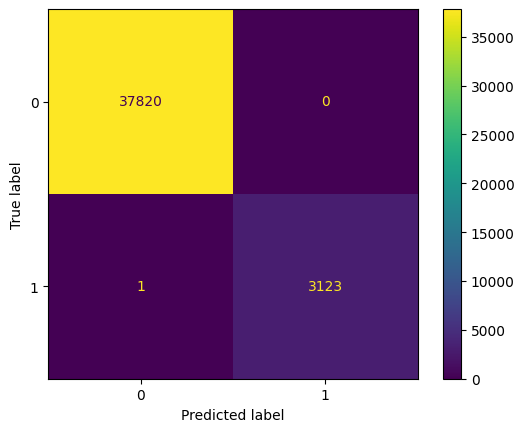

In [37]:
## Training Performance
ConfusionMatrixDisplay(confusion_matrix(y_train, dt.predict(X_train))).plot()

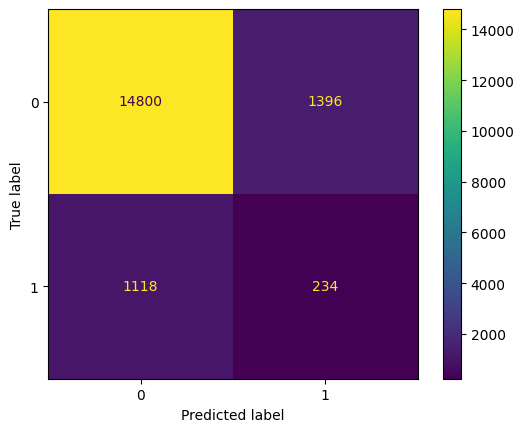

In [38]:
## Test Performance
ConfusionMatrixDisplay(confusion_matrix(y_test, dt.predict(X_test))).plot()

In [40]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     16196
           1       0.14      0.17      0.16      1352

    accuracy                           0.86     17548
   macro avg       0.54      0.54      0.54     17548
weighted avg       0.87      0.86      0.86     17548



## Hyperparameter Tuning

In [41]:
## max_depth
## gini, entropy
## max_leaf_nodes

In [43]:
## Let's use cross-validation to determine best hyper-parameters:
from sklearn.model_selection import cross_val_score

## this implements cross-validation
dt = DecisionTreeClassifier(max_depth = 3)  ## do not want to peak on the test

In [47]:
cross_val_score(dt, X_train, y_train, cv = 5) ## cv = 5 or cv = 10 most common

array([0.9236781 , 0.9236781 , 0.9236781 , 0.9236781 , 0.92379091])

In [45]:
## accuracy for each test on the cv

In [51]:
dt = DecisionTreeClassifier(max_depth = 5)

In [53]:
cross_val_score(dt, X_train, y_train, cv = 5).mean() ## cv = 5 or cv = 10 most common

0.9232121885000332